In [21]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# adjust the style to emulate ggplot
plt.style.use('ggplot')

In [2]:
# loading the data
bicing_status = pd.read_parquet(r'..\data\processed\bicing_status.parquet')
meteo_stats = pd.read_parquet(r'..\data\processed\meteo_stats.parquet')


In [3]:
bicing_status.sample(5)

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
11721069,387,2022,4,8,5,False,spring,10,8.0,22.0,0.733333,0.689655,0.620690,0.482759,0.733333
9873566,327,2020,2,5,3,False,winter,15,2.0,22.0,0.916667,0.854167,0.833333,0.875000,0.916667
14342371,488,2021,3,12,5,False,spring,17,14.0,10.0,0.583333,0.666667,0.708333,0.750000,0.416667
10136641,336,2021,5,1,6,True,spring,8,18.0,9.0,0.296296,0.296296,0.259259,0.296296,0.333333
7237294,241,2020,11,21,6,True,autumn,15,1.0,30.0,0.935484,0.903226,0.903226,0.741935,0.967742


In [4]:
meteo_stats.sample(5)

,avg_wind_direction,max_streak_wind_direction,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,year,month,day
234,232.000000,215.000000,70.50,994.200012,0.0,24.666666,26.475,22.775,31.025000,2.333333,8.800000,2022,8,23
344,318.333344,290.000000,66.25,986.099976,0.1,8.100000,10.325,7.550,14.775000,2.500000,12.200000,2020,12,10
289,105.000000,172.666672,79.25,999.066650,0.0,11.700000,18.150,15.250,21.775000,1.533333,5.900000,2021,10,17
338,46.333332,163.000000,67.00,996.433350,0.0,8.300000,10.375,6.550,13.625000,2.066667,6.033333,2022,12,5
88,222.333328,204.333328,73.00,999.866638,0.0,19.033333,14.850,11.300,20.075001,2.166667,6.566667,2023,3,30


In [5]:
# joining the DataFrames: bicing_status and meteo_stats
bicing = (bicing_status
          .astype({'season': 'category'})   # the files previously saved as .parquet do not keep the dtype='category' (?)
          .merge(meteo_stats, on=['year', 'month', 'day'], how='left', indicator=True, validate='many_to_one')  # many_to_one: the bicing_status DataFrame has one year, month, day line per station_id
)

In [6]:
bicing

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,...,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,_merge
0,1,2019,7,1,1,False,summer,4,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1,2019,7,1,1,False,summer,5,21.5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1,2019,7,1,1,False,summer,6,16.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1,2019,7,1,1,False,summer,7,9.5,16.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1,2019,7,1,1,False,summer,8,1.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116743,529,2021,8,16,1,False,summer,10,198.0,99.0,...,68.5,996.700012,0.0,23.500000,26.049999,23.25,31.299999,3.133333,9.500000,both
15116744,530,2020,8,12,3,False,summer,8,198.0,99.0,...,69.5,993.266663,0.0,21.733334,27.450001,24.65,31.924999,3.033333,9.466666,both
15116745,530,2020,8,12,3,False,summer,9,198.0,99.0,...,69.5,993.266663,0.0,21.733334,27.450001,24.65,31.924999,3.033333,9.466666,both
15116746,530,2020,12,3,4,False,winter,15,198.0,99.0,...,58.0,987.366638,0.0,9.200000,9.000000,5.10,12.750000,4.200000,13.966666,both


In [7]:
bicing.shape

(15116748, 27)

In [8]:
bicing.dtypes

station_id                      uint16
year                            uint16
month                            uint8
day                              uint8
weekday                          uint8
weekend                           bool
season                        category
hour                             uint8
num_bikes_available            float32
num_docks_available            float32
ctx_1                          float32
ctx_2                          float32
ctx_3                          float32
ctx_4                          float32
percentage_docks_available     float32
avg_wind_direction             float32
max_streak_wind_direction      float32
avg_rel_humidity               float32
avg_atm_pressure               float32
acum_precipitation             float32
global_solar_rad               float32
avg_temp                       float32
min_temp                       float32
max_temp                       float32
avg_wind_speed                 float32
max_wind_speed           

In [9]:
bicing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15116748 entries, 0 to 15116747
Data columns (total 27 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   station_id                  uint16  
 1   year                        uint16  
 2   month                       uint8   
 3   day                         uint8   
 4   weekday                     uint8   
 5   weekend                     bool    
 6   season                      category
 7   hour                        uint8   
 8   num_bikes_available         float32 
 9   num_docks_available         float32 
 10  ctx_1                       float32 
 11  ctx_2                       float32 
 12  ctx_3                       float32 
 13  ctx_4                       float32 
 14  percentage_docks_available  float32 
 15  avg_wind_direction          float32 
 16  max_streak_wind_direction   float32 
 17  avg_rel_humidity            float32 
 18  avg_atm_pressure            float32 
 19

In [10]:
(bicing
 .memory_usage(deep=True)
 .pipe(lambda ser: ser/ser.sum()*100)
)

Index                         0.000010
station_id                    2.409637
year                          2.409637
month                         1.204818
day                           1.204818
weekday                       1.204818
weekend                       1.204818
season                        1.204852
hour                          1.204818
num_bikes_available           4.819274
num_docks_available           4.819274
ctx_1                         4.819274
ctx_2                         4.819274
ctx_3                         4.819274
ctx_4                         4.819274
percentage_docks_available    4.819274
avg_wind_direction            4.819274
max_streak_wind_direction     4.819274
avg_rel_humidity              4.819274
avg_atm_pressure              4.819274
acum_precipitation            4.819274
global_solar_rad              4.819274
avg_temp                      4.819274
min_temp                      4.819274
max_temp                      4.819274
avg_wind_speed           

In [11]:
bicing.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,15116748.0,252.346149,146.081224,1.000000,127.000000,251.000000,375.000000,530.000000
year,15116748.0,2021.073039,1.170434,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,15116748.0,6.614376,3.493727,1.000000,4.000000,7.000000,10.000000,12.000000
day,15116748.0,15.768636,8.782417,1.000000,8.000000,16.000000,23.000000,31.000000
weekday,15116748.0,3.980793,1.992957,1.000000,2.000000,4.000000,6.000000,7.000000
hour,15116748.0,11.571896,6.856760,0.000000,6.000000,12.000000,17.000000,23.000000
num_bikes_available,15116748.0,10.102408,51.842369,1.000000,3.000000,8.500000,15.000000,65535.000000
num_docks_available,15116748.0,15.538657,8.103662,1.000000,9.500000,16.000000,21.000000,99.000000
ctx_1,15116748.0,0.608165,0.279193,0.000275,0.394231,0.653846,0.863636,0.981481
ctx_2,15116748.0,0.608165,0.279193,0.000275,0.394231,0.653846,0.863636,0.981481


In [12]:
(bicing
 .isna()
 .sum()
#  .pipe(lambda ser: ser/ser.sum()*100) # percentage of missing values per column
)

station_id                          0
year                                0
month                               0
day                                 0
weekday                             0
weekend                             0
season                              0
hour                                0
num_bikes_available                 0
num_docks_available                 0
ctx_1                               0
ctx_2                               0
ctx_3                               0
ctx_4                               0
percentage_docks_available          0
avg_wind_direction            1652196
max_streak_wind_direction     1652196
avg_rel_humidity              1652196
avg_atm_pressure              1652196
acum_precipitation            1652196
global_solar_rad              1652196
avg_temp                      1652196
min_temp                      1652196
max_temp                      1652196
avg_wind_speed                1652196
max_wind_speed                1652196
_merge      

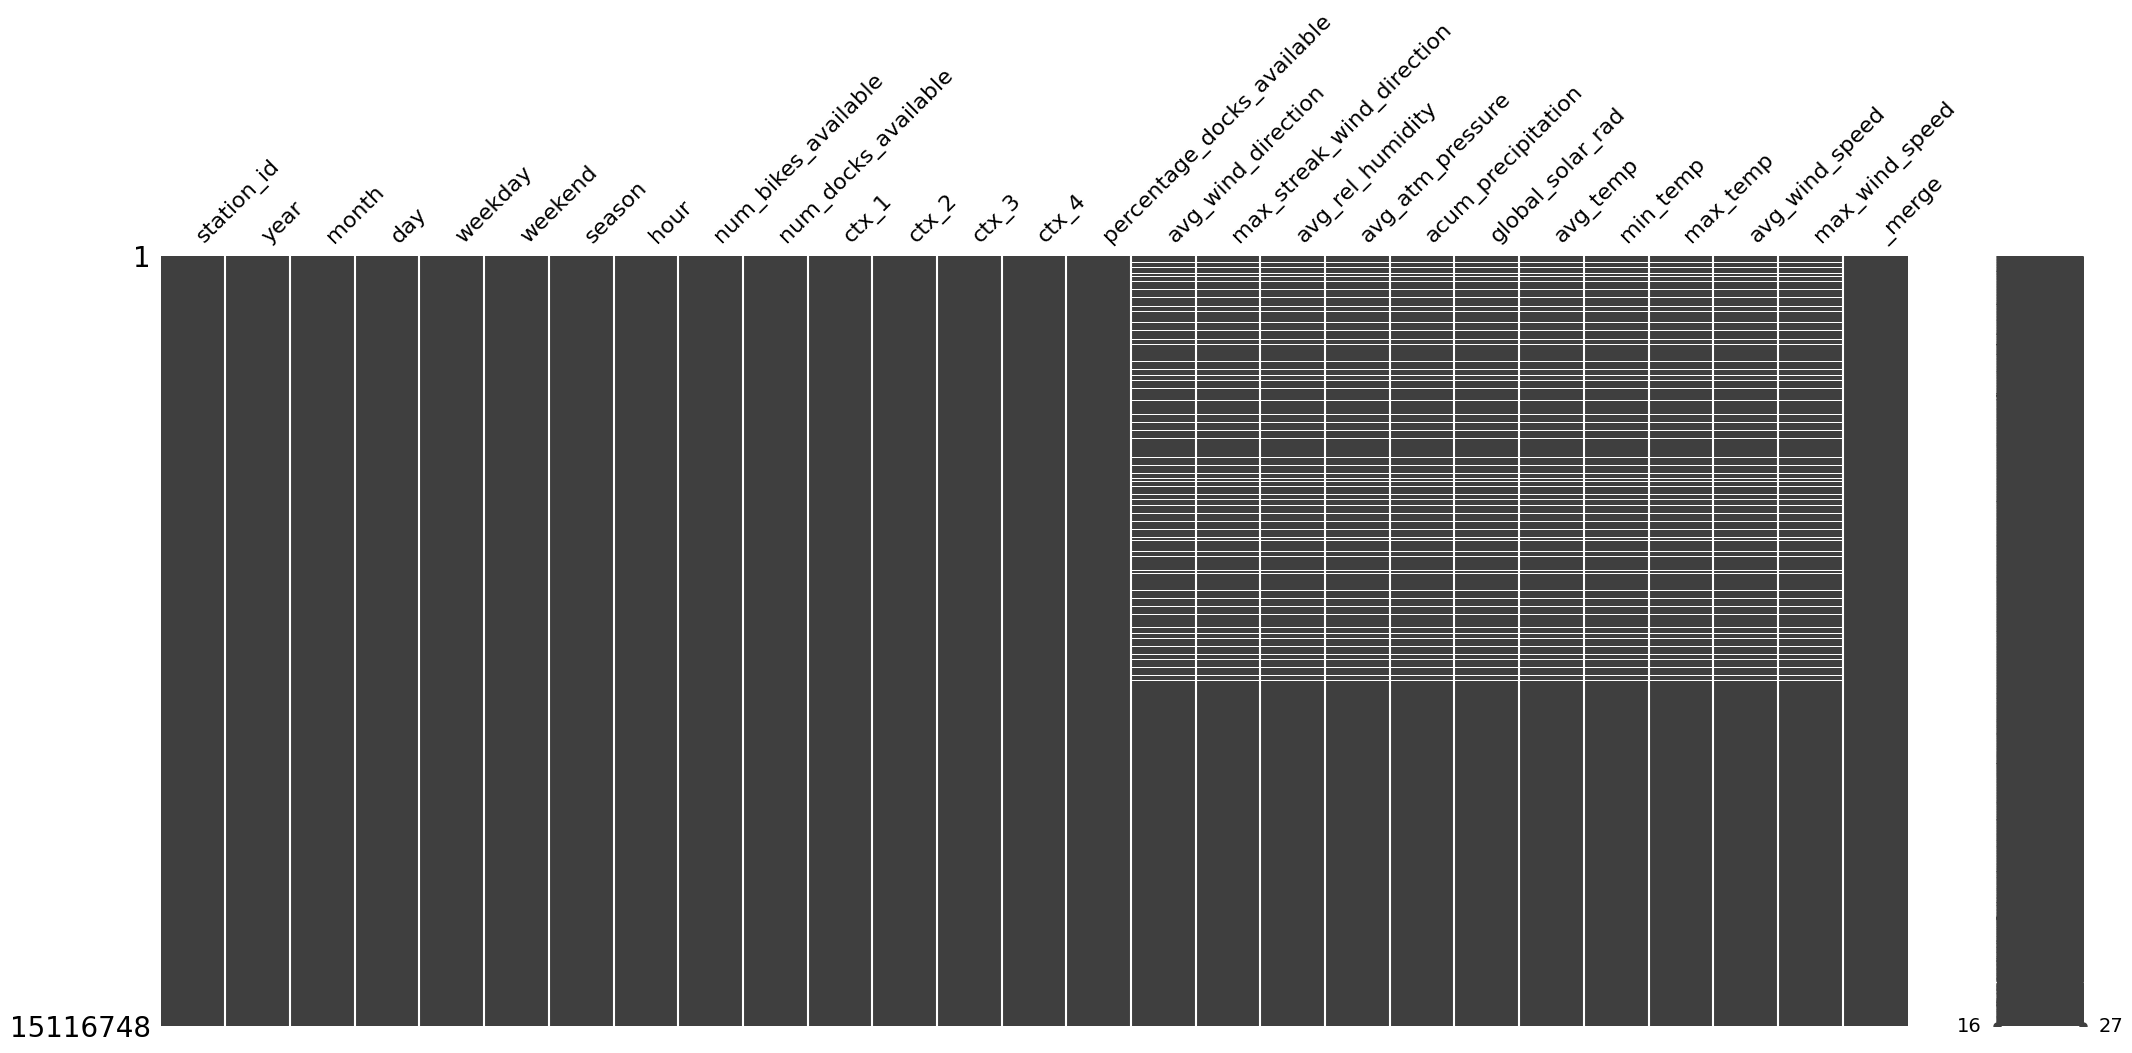

In [13]:
ax = msno.matrix(bicing.sort_values(by=['station_id', 'year', 'month', 'day']))
ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0101.png')

In [17]:
missing = bicing.isna().any(axis=1)
bicing[missing]

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,...,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,_merge
0,1,2019,7,1,1,False,summer,4,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1,2019,7,1,1,False,summer,5,21.5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1,2019,7,1,1,False,summer,6,16.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1,2019,7,1,1,False,summer,7,9.5,16.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1,2019,7,1,1,False,summer,8,1.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116713,520,2023,5,31,3,False,spring,17,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15116714,520,2023,5,31,3,False,spring,18,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15116715,520,2023,5,31,3,False,spring,19,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15116716,520,2023,5,31,3,False,spring,21,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


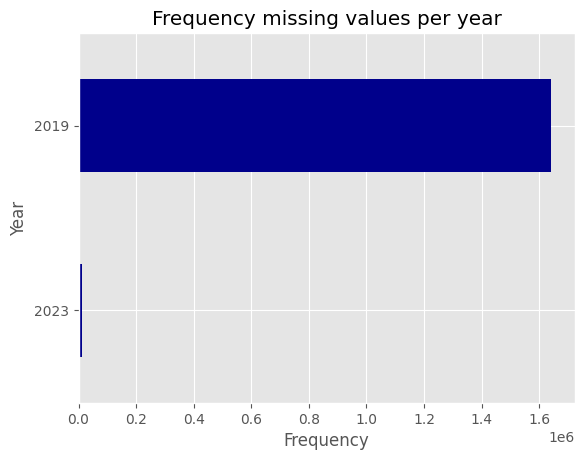

In [48]:
fig, ax = plt.subplots()

(bicing[missing]
 ['year']
 .value_counts(ascending=True)
 .plot.barh(ax=ax, color='darkblue')
)

plt.xlabel('Frequency')
plt.ylabel('Year')
plt.title('Frequency missing values per year')

ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0102.png')

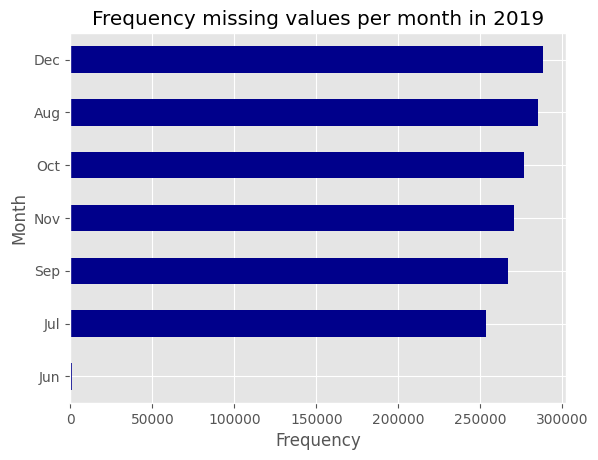

In [47]:
month_shorts = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

fig, ax = plt.subplots()

(bicing[missing]
 .query('year == 2019')
 ['month']
 .map(month_shorts)
 .value_counts(ascending=True)
 .plot.barh(ax=ax, color='darkblue')
)

plt.xlabel('Frequency')
plt.ylabel('Month')
plt.title('Frequency missing values per month in 2019')

ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0103.png')

In [49]:
bicing_cols = bicing.columns.to_list()
bicing_cols.remove('percentage_docks_available')
bicing_cols.append('percentage_docks_available')

(bicing
 .loc[:, bicing_cols]
 .select_dtypes('number')
 .drop(columns=['station_id', 'year', 'num_bikes_available', 'num_docks_available'])
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)
 .set_sticky(axis='index')
)

,month,day,weekday,hour,ctx_1,ctx_2,ctx_3,ctx_4,avg_wind_direction,max_streak_wind_direction,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,percentage_docks_available
month,1.000000,0.009952,-0.003487,0.002062,0.046842,0.046889,0.046946,0.047009,-0.004576,0.017530,0.099843,-0.186110,0.034887,-0.059369,0.366218,0.376511,0.333477,-0.114605,-0.075941,0.046817
day,0.009952,1.000000,-0.006254,0.002350,0.000059,0.000076,0.000091,0.000113,0.007921,-0.001467,0.024700,-0.003270,-0.043436,0.026676,0.060271,0.064122,0.057137,-0.029549,0.000887,0.000047
weekday,-0.003487,-0.006254,1.000000,-0.001518,-0.011088,-0.010999,-0.010957,-0.010717,0.040115,0.028497,-0.042352,-0.016582,-0.029305,0.026117,0.003164,-0.003532,0.014990,0.022392,0.018054,-0.011200
hour,0.002062,0.002350,-0.001518,1.000000,0.055722,0.062118,0.066837,0.066643,-0.002345,0.000198,-0.000794,0.002415,-0.001942,0.002607,0.002213,0.002416,0.001942,0.001019,0.000949,0.045849
ctx_1,0.046842,0.000059,-0.011088,0.055722,1.000000,0.881133,0.759269,0.654468,-0.022803,-0.025268,-0.009918,-0.002653,-0.017499,0.044994,0.079984,0.079132,0.079161,-0.018319,-0.015574,0.881133
ctx_2,0.046889,0.000076,-0.010999,0.062118,0.881133,1.000000,0.881133,0.759269,-0.023039,-0.025436,-0.009819,-0.002657,-0.017214,0.044700,0.079903,0.079090,0.079029,-0.018344,-0.015539,0.759269
ctx_3,0.046946,0.000091,-0.010957,0.066837,0.759269,0.881133,1.000000,0.881133,-0.023284,-0.025600,-0.009693,-0.002663,-0.016898,0.044382,0.079828,0.079056,0.078898,-0.018332,-0.015453,0.654468
ctx_4,0.047009,0.000113,-0.010717,0.066643,0.654468,0.759269,0.881133,1.000000,-0.023564,-0.025829,-0.009525,-0.002655,-0.016507,0.044029,0.079762,0.079029,0.078768,-0.018331,-0.015358,0.562125
avg_wind_direction,-0.004576,0.007921,0.040115,-0.002345,-0.022803,-0.023039,-0.023284,-0.023564,1.000000,0.760281,-0.339147,-0.062207,-0.124546,-0.150002,-0.303958,-0.360975,-0.211249,0.343042,0.322316,-0.022612
max_streak_wind_direction,0.017530,-0.001467,0.028497,0.000198,-0.025268,-0.025436,-0.025600,-0.025829,0.760281,1.000000,-0.350557,-0.028893,-0.148387,-0.172860,-0.289012,-0.343699,-0.204263,0.274049,0.283952,-0.025139


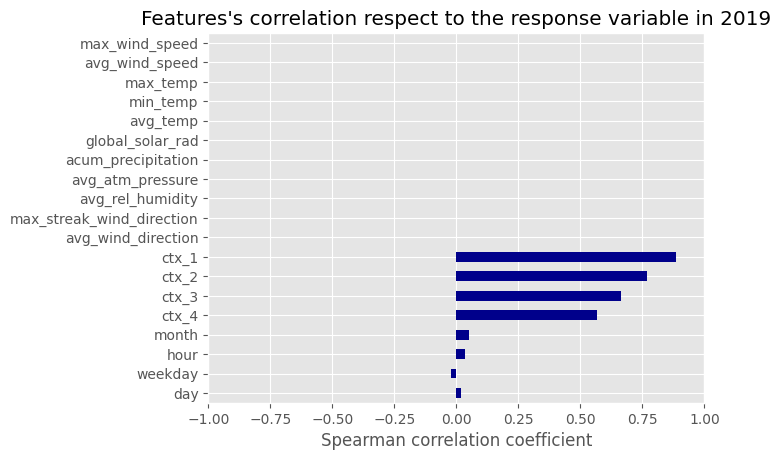

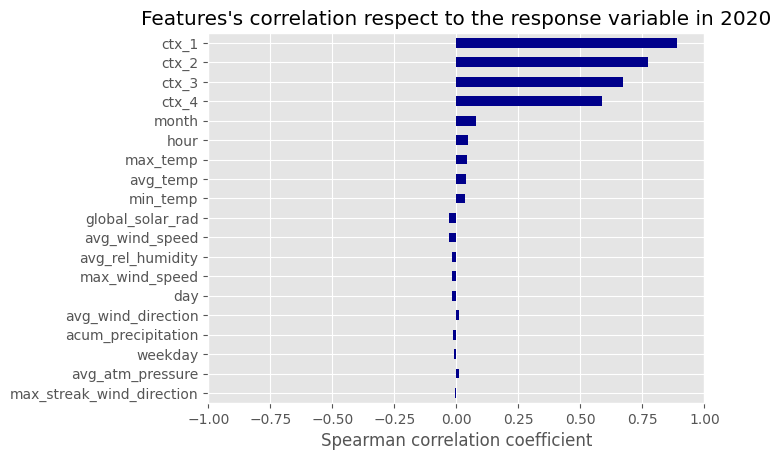

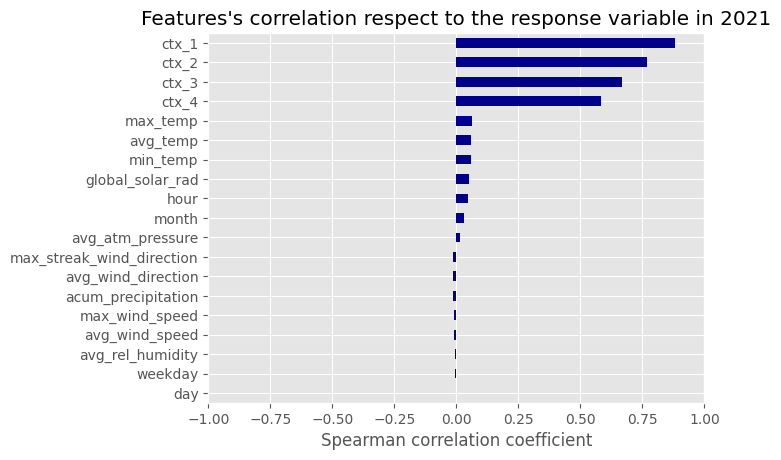

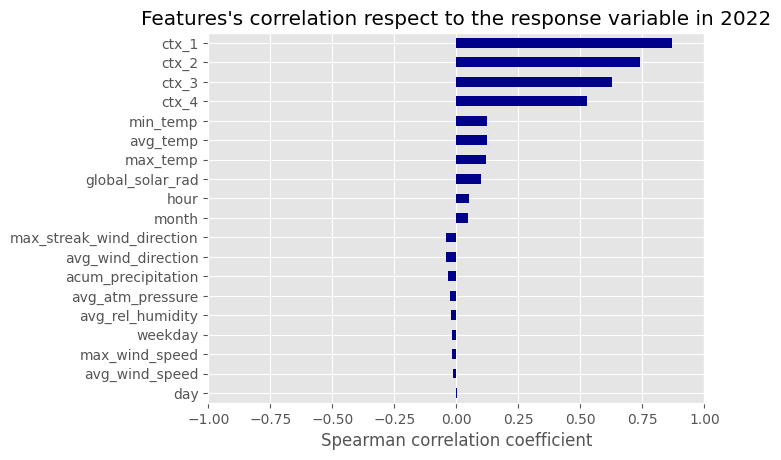

In [58]:
for year in [2019, 2020, 2021, 2022]:
    
    fig, ax = plt.subplots()
    
    (bicing
     .query(f'year == {year}')
     .loc[:, bicing_cols]
     .select_dtypes('number')
     .drop(columns=['station_id', 'year', 'num_bikes_available', 'num_docks_available'])
     .corr(method='spearman')
     .loc[:, 'percentage_docks_available']
     .iloc[:-1]
     .sort_values(key=lambda val: abs(val))
     .plot.barh(ax=ax, color='darkblue', xlim=(-1, 1))
    )
    
    plt.xlabel('Spearman correlation coefficient')
    plt.title(f"Features's correlation respect to the response variable in {year}")